In [12]:
import pandas as pd 
import numpy as np 
import scipy.stats as stats
from scipy.stats import pearsonr
from scipy.stats import zscore
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

In [5]:
headway_data = pd.read_csv("../data/headway_data.csv", delimiter = '\t')
headway_data.head(5)

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,...,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,BLOCK_STOP_ORDER,DWELL_IN_MINS,HDWY_DEV_PERC
0,120230801,1,99457897,2023-08-01,22,2200,1040,345106,0,TO DOWNTOWN,...,2.666666,0,0,1,0,0.0,0,63,13.216666,0.076190
1,120230801,1,99457898,2023-08-01,22,2200,1040,345106,0,TO DOWNTOWN,...,1.966666,0,0,1,0,0.0,0,70,0.000000,0.056190
2,120230801,1,99457899,2023-08-01,22,2200,1040,345106,0,TO DOWNTOWN,...,-0.483334,0,0,1,0,0.0,0,80,0.000000,-0.032222
3,120230801,1,99457901,2023-08-01,22,2200,1040,345107,0,FROM DOWNTOWN,...,-2.166667,0,0,1,0,0.0,0,97,10.800000,-0.144444
4,120230801,1,99457902,2023-08-01,22,2200,1040,345107,0,FROM DOWNTOWN,...,-3.883334,1,0,0,0,0.0,0,112,0.000000,-0.258889


**Question:** Calculate Z-Scores and Quantiles to determine outliers and remove them. 

In [6]:
# Add z-scores for headway_deviation and adherence
headway_data['Z_HDWY_DEV'] = zscore(headway_data['HDWY_DEV'])
headway_data['Z_ADHERENCE'] = zscore(headway_data['ADHERENCE'])
headway_data.head()

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,...,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,BLOCK_STOP_ORDER,DWELL_IN_MINS,HDWY_DEV_PERC,Z_HDWY_DEV,Z_ADHERENCE
0,120230801,1,99457897,2023-08-01,22,2200,1040,345106,0,TO DOWNTOWN,...,0,1,0,0.0,0,63,13.216666,0.076190,0.300000,0.274867
1,120230801,1,99457898,2023-08-01,22,2200,1040,345106,0,TO DOWNTOWN,...,0,1,0,0.0,0,70,0.000000,0.056190,0.202259,0.244098
2,120230801,1,99457899,2023-08-01,22,2200,1040,345106,0,TO DOWNTOWN,...,0,1,0,0.0,0,80,0.000000,-0.032222,-0.139835,0.510757
3,120230801,1,99457901,2023-08-01,22,2200,1040,345107,0,FROM DOWNTOWN,...,0,1,0,0.0,0,97,10.800000,-0.144444,-0.374878,0.336403
4,120230801,1,99457902,2023-08-01,22,2200,1040,345107,0,FROM DOWNTOWN,...,0,0,0,0.0,0,112,0.000000,-0.258889,-0.614577,0.769723


In [7]:
headway_data['Unique_TRIP_ID'] = headway_data['CALENDAR_ID'].astype(str) + '_' + headway_data['TRIP_ID'].astype(str)
headway_data.head()

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,...,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,BLOCK_STOP_ORDER,DWELL_IN_MINS,HDWY_DEV_PERC,Z_HDWY_DEV,Z_ADHERENCE,Unique_TRIP_ID
0,120230801,1,99457897,2023-08-01,22,2200,1040,345106,0,TO DOWNTOWN,...,1,0,0.0,0,63,13.216666,0.076190,0.300000,0.274867,120230801_345106
1,120230801,1,99457898,2023-08-01,22,2200,1040,345106,0,TO DOWNTOWN,...,1,0,0.0,0,70,0.000000,0.056190,0.202259,0.244098,120230801_345106
2,120230801,1,99457899,2023-08-01,22,2200,1040,345106,0,TO DOWNTOWN,...,1,0,0.0,0,80,0.000000,-0.032222,-0.139835,0.510757,120230801_345106
3,120230801,1,99457901,2023-08-01,22,2200,1040,345107,0,FROM DOWNTOWN,...,1,0,0.0,0,97,10.800000,-0.144444,-0.374878,0.336403,120230801_345107
4,120230801,1,99457902,2023-08-01,22,2200,1040,345107,0,FROM DOWNTOWN,...,0,0,0.0,0,112,0.000000,-0.258889,-0.614577,0.769723,120230801_345107


**Question:** How many unique IDs do we have? 

In [9]:
headway_data['Unique_TRIP_ID'].nunique()

64928

**Question:** What are the statistiscs on the z-scores?

In [32]:
zscore_stats = headway_data.agg({
    'Z_HDWY_DEV': ['count', 'mean', 'std', 'min', 'max'],
    'Z_ADHERENCE': ['count', 'mean', 'std', 'min', 'max']
}).reset_index()

# Rename columns for clarity
zscore_stats.columns = ['Statistic', 'Z_HDWY_DEV', 'Z_ADHERENCE']

zscore_stats

,Statistic,Z_HDWY_DEV,Z_ADHERENCE
0,count,265884.00000000,265884.00000000
1,mean,-0.00000000,-0.00000000
2,std,1.00000188,1.00000188
3,min,-9.00866700,-145.38461955
4,max,78.87911290,13.71803014


**Visualization:** Create a density plot for z-scores

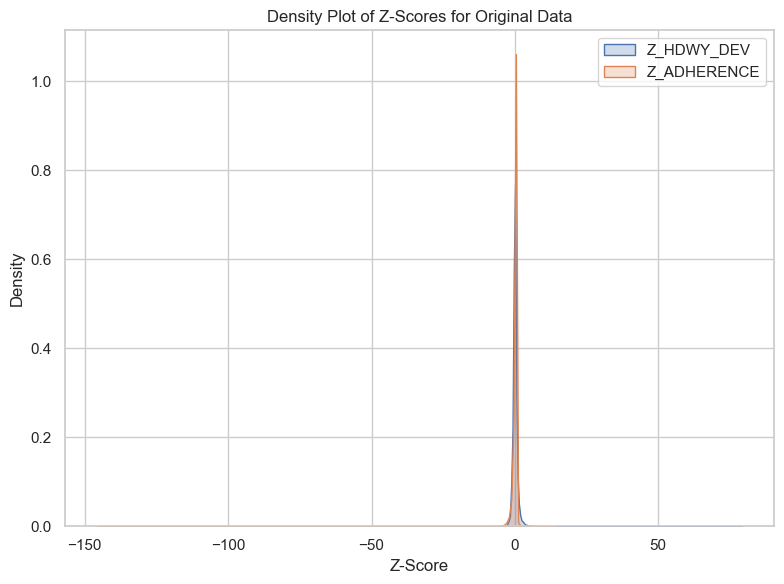

In [24]:
# Set the style for the plot (optional, for styling)
sns.set(style="whitegrid")

# Create a density plot (kernel density estimate) for 'Z_HDWY_DEV' and 'Z_ADHERENCE'
plt.figure(figsize=(8, 6))

# Create a density plot for 'Z_HDWY_DEV'
sns.kdeplot(data=headway_data, x='Z_HDWY_DEV', fill=True, common_norm=True, label='Z_HDWY_DEV')

# Create a density plot for 'Z_ADHERENCE'
sns.kdeplot(data=headway_data, x='Z_ADHERENCE', fill=True, common_norm=True, label='Z_ADHERENCE')

# Customize the x-axis limits to remove excessive white space
# plt.xlim(-10, 10)  # Adjust the limits as needed based on your data

# Customize the plot
plt.xlabel('Z-Score')
plt.ylabel('Density')
plt.title('Density Plot of Z-Scores for Original Data')
plt.tight_layout()

# Show the plot
plt.legend()
plt.show()

**Create a new dataframe**

Filter: Only keep the data points that falls within 90% of distribution. 

In [34]:
z_scores = headway_data['Z_HDWY_DEV']
z_scores2 = headway_data['Z_ADHERENCE']

# Determine the z-score values for the 5th and 95th percentiles
z_score_5th_percentile = norm.ppf(0.05)
z_score_95th_percentile = norm.ppf(0.95)

# Filter the DataFrame to retain only rows within the z-score range
prepocessed_data = headway_data[(z_scores >= z_score_5th_percentile) & (z_scores <= z_score_95th_percentile)]
processed_data = prepocessed_data.loc[(z_scores2 >= z_score_5th_percentile) & (z_scores2 <= z_score_95th_percentile)]

# 'filtered_df' now contains the data with outliers removed, retaining the central 90% of the data.
processed_data.head()

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,...,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,BLOCK_STOP_ORDER,DWELL_IN_MINS,HDWY_DEV_PERC,Z_HDWY_DEV,Z_ADHERENCE,Unique_TRIP_ID
0,120230801,1,99457897,2023-08-01,22,2200,1040,345106,0,TO DOWNTOWN,...,1,0,0.00000000,0,63,13.21666600,0.07619046,0.29999995,0.27486666,120230801_345106
1,120230801,1,99457898,2023-08-01,22,2200,1040,345106,0,TO DOWNTOWN,...,1,0,0.00000000,0,70,0.00000000,0.05619046,0.20225895,0.24409840,120230801_345106
2,120230801,1,99457899,2023-08-01,22,2200,1040,345106,0,TO DOWNTOWN,...,1,0,0.00000000,0,80,0.00000000,-0.03222227,-0.13983456,0.51075657,120230801_345106
3,120230801,1,99457901,2023-08-01,22,2200,1040,345107,0,FROM DOWNTOWN,...,1,0,0.00000000,0,97,10.80000000,-0.14444447,-0.37487836,0.33640317,120230801_345107
4,120230801,1,99457902,2023-08-01,22,2200,1040,345107,0,FROM DOWNTOWN,...,0,0,0.00000000,0,112,0.00000000,-0.25888893,-0.61457658,0.76972267,120230801_345107


**Question**: How many unique IDs do we have?

In [39]:
processed_data['Unique_TRIP_ID'].nunique()

63331

In [36]:
processed_data_stats = processed_data.agg({
    'Z_HDWY_DEV': ['count', 'mean', 'std', 'min', 'max'],
    'Z_ADHERENCE': ['count', 'mean', 'std', 'min', 'max']
}).reset_index()

# Rename columns for clarity
processed_data_stats.columns = ['Statistic', 'Z_HDWY_DEV', 'Z_ADHERENCE']

processed_data_stats

,Statistic,Z_HDWY_DEV,Z_ADHERENCE
0,count,247584.00000000,247584.00000000
1,mean,-0.07284784,0.10976654
2,std,0.54747810,0.46687470
3,min,-1.64318420,-1.64302133
4,max,1.64277522,1.63892589


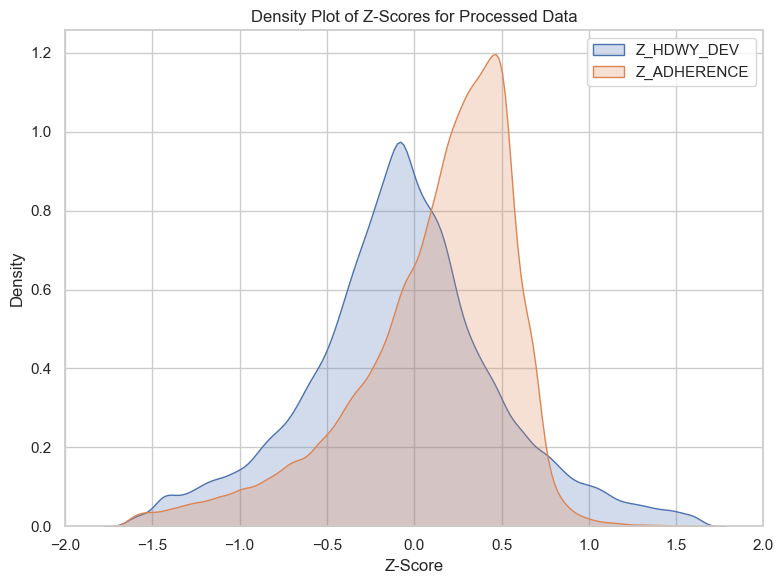

In [37]:
# Set the style for the plot (optional, for styling)
sns.set(style="whitegrid")

# Create a density plot (kernel density estimate) for 'Z_HDWY_DEV' and 'Z_ADHERENCE'
plt.figure(figsize=(8, 6))

# Create a density plot for 'Z_HDWY_DEV'
sns.kdeplot(data=processed_data, x='Z_HDWY_DEV', fill=True, common_norm=True, label='Z_HDWY_DEV')

# Create a density plot for 'Z_ADHERENCE'
sns.kdeplot(data=processed_data, x='Z_ADHERENCE', fill=True, common_norm=True, label='Z_ADHERENCE')

# Customize the x-axis limits to remove excessive white space
plt.xlim(-2, 2)  # Adjust the limits as needed based on your data

# Customize the plot
plt.xlabel('Z-Score')
plt.ylabel('Density')
plt.title('Density Plot of Z-Scores for Processed Data')
plt.tight_layout()

# Show the plot
plt.legend()
plt.show()

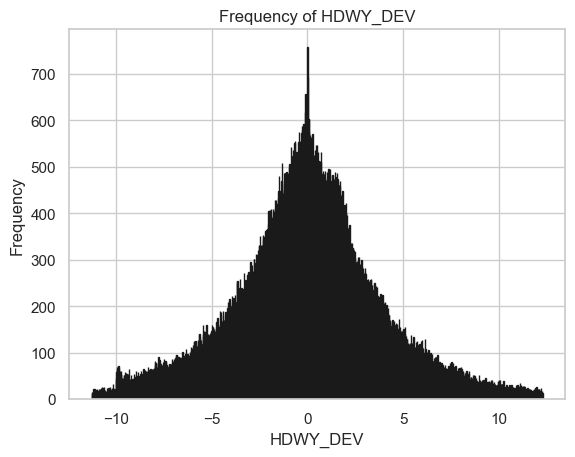

In [45]:
plt.hist(processed_data['HDWY_DEV'], bins=len(processed_data['HDWY_DEV'].unique()), edgecolor='k')
plt.xlabel('HDWY_DEV')
plt.ylabel('Frequency')
plt.title('Frequency of HDWY_DEV')
plt.show()

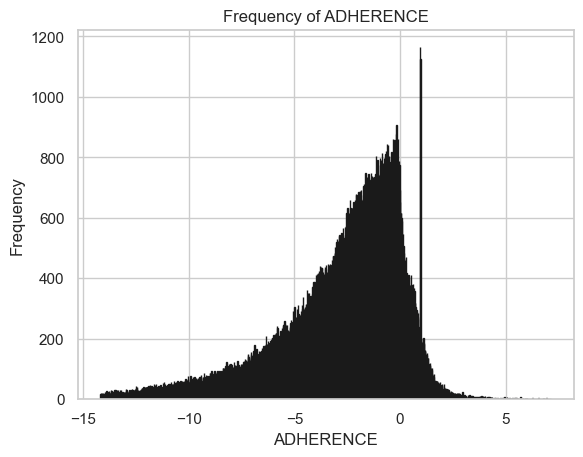

In [47]:
plt.hist(processed_data['ADHERENCE'], bins=len(processed_data['HDWY_DEV'].unique()), edgecolor='k')
plt.xlabel('ADHERENCE')
plt.ylabel('Frequency')
plt.title('Frequency of ADHERENCE')
plt.show()